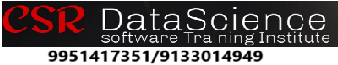

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv("insurance_data.csv")

In [50]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [51]:
df.shape

(1340, 11)

# Preprocessing the data 

In [52]:
#Identifing the data 
df.dtypes

index              int64
PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

In [53]:
#differentiating the data set into character data and numeric data 


In [54]:
df_num = df.select_dtypes(include=[np.number])


In [55]:
df_num.head()

,index,PatientID,age,bmi,bloodpressure,children,claim
0,0,1,39.0,23.2,91,0,1121.87
1,1,2,24.0,30.1,87,0,1131.51
2,2,3,NaN,33.3,82,0,1135.94
3,3,4,NaN,33.7,80,0,1136.40
4,4,5,NaN,34.1,100,0,1137.01


In [56]:
df_car = df.select_dtypes(include=[object])

In [57]:
df_car.head()

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest


In [58]:
#Checking how many null values are there in the both data sets

In [59]:
df_car.isnull().sum()

gender      0
diabetic    0
smoker      0
region      3
dtype: int64

In [60]:
df_num.isnull().sum()

index            0
PatientID        0
age              5
bmi              0
bloodpressure    0
children         0
claim            0
dtype: int64

In [61]:
#Converting Character data into Numeric data by using labelEncoder

In [62]:
#Importing Label Encoder library by using Sklearn.Preprocessing
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

In [64]:
df_car = df_car.apply(le.fit_transform)

In [65]:
df_car.head()

,gender,diabetic,smoker,region
0,1,1,0,2
1,1,0,0,2
2,1,1,0,2
3,1,0,0,1
4,1,0,0,1


In [66]:
#Merging the Caracter data and numeric data by using concatination 

In [67]:
df_final =pd.concat([df_num,df_car],axis=1)

In [68]:
df_final

,index,PatientID,age,bmi,bloodpressure,children,claim,gender,diabetic,smoker,region
0,0,1,39.0,23.2,91,0,1121.87,1,1,0,2
1,1,2,24.0,30.1,87,0,1131.51,1,0,0,2
2,2,3,NaN,33.3,82,0,1135.94,1,1,0,2
3,3,4,NaN,33.7,80,0,1136.40,1,0,0,1
4,4,5,NaN,34.1,100,0,1137.01,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,35.5,88,0,55135.40,0,1,1,1
1336,1336,1337,59.0,38.1,120,1,58571.07,0,0,1,0
1337,1337,1338,30.0,34.5,91,3,60021.40,1,1,1,1
1338,1338,1339,37.0,30.4,106,0,62592.87,1,0,1,2


In [69]:
#Divide the entire data set into Test and train data set 

In [70]:
x=df_final[['age','bmi','smoker']]

In [71]:
x.head()

,age,bmi,smoker
0,39.0,23.2,0
1,24.0,30.1,0
2,NaN,33.3,0
3,NaN,33.7,0
4,NaN,34.1,0


In [72]:
y=df_final[['claim']]

In [73]:
y.head()

,claim
0,1121.87
1,1131.51
2,1135.94
3,1136.40
4,1137.01


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [79]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [80]:
#Applying algoritham on the above data set

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(x_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
fit=lr.fit(x_train,y_train)

In [ ]:
fit.score(x_train,y_train)

In [39]:
lr.predict([[19,27.900,1]])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


AttributeError: 'LinearRegression' object has no attribute 'coef_'